In [ ]:
import zipfile
import os

# Name of your uploaded ZIP file (make sure it matches exactly)
zip_filename = "archive (2).zip"
extract_path = "extracted_data"

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
print("Extracted files:", os.listdir(extract_path))


Extracted files: ['flights.csv', 'airlines.csv', 'airports.csv']


In [ ]:
import pandas as pd

airlines_df = pd.read_csv(f"{extract_path}/airlines.csv")
airports_df = pd.read_csv(f"{extract_path}/airports.csv")
flights_df = pd.read_csv(f"{extract_path}/flights.csv")

# Preview the data
print(airlines_df.head())
print(airports_df.head())
print(flights_df.head())


<ipython-input-4-8011d5b4d4ce>:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df = pd.read_csv(f"{extract_path}/flights.csv")


  IATA_CODE                 AIRLINE
0        UA   United Air Lines Inc.
1        AA  American Airlines Inc.
2        US         US Airways Inc.
3        F9  Frontier Airlines Inc.
4        B6         JetBlue Airways
  IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447  
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1   

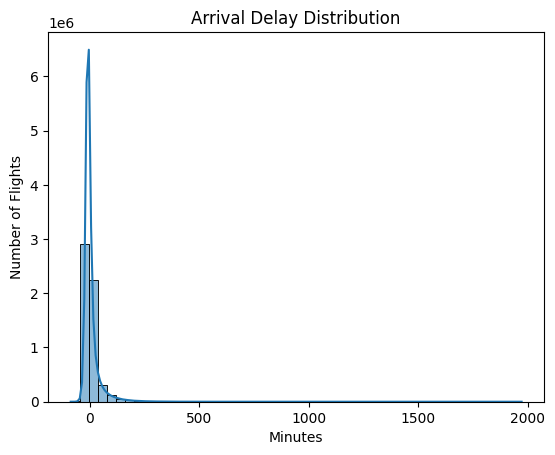

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of arrival delays
sns.histplot(flights_df['ARRIVAL_DELAY'].dropna(), bins=50, kde=True)
plt.title("Arrival Delay Distribution")
plt.xlabel("Minutes")
plt.ylabel("Number of Flights")
plt.show()


<Axes: title={'center': 'Top 10 Airlines by Number of Flights'}, xlabel='AIRLINE'>

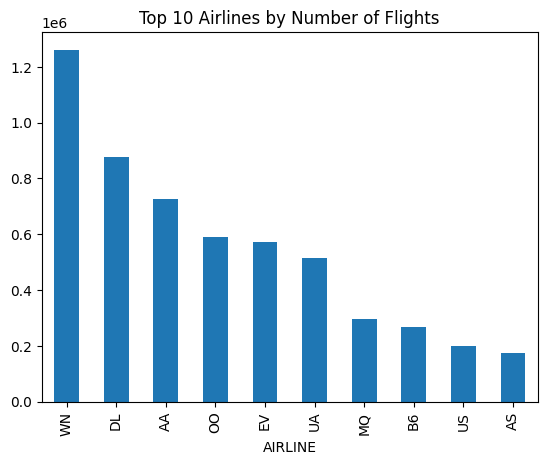

In [ ]:
flights_df['AIRLINE'].value_counts().head(10).plot(kind='bar', title='Top 10 Airlines by Number of Flights')


In [ ]:
print(airlines_df.info())
print(airports_df.info())
print(flights_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------            

In [ ]:
flights_df.describe()


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [ ]:
flights_df.isnull().sum()


,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,14721
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


<Axes: title={'center': 'Top 10 Airlines by Number of Flights'}, xlabel='AIRLINE'>

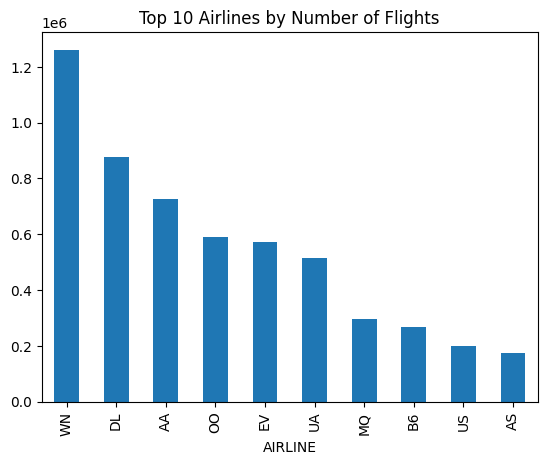

In [ ]:
flights_df['AIRLINE'].value_counts().head(10).plot(kind='bar', title='Top 10 Airlines by Number of Flights')


<Axes: title={'center': 'Average Arrival Delay per Airline'}, ylabel='AIRLINE'>

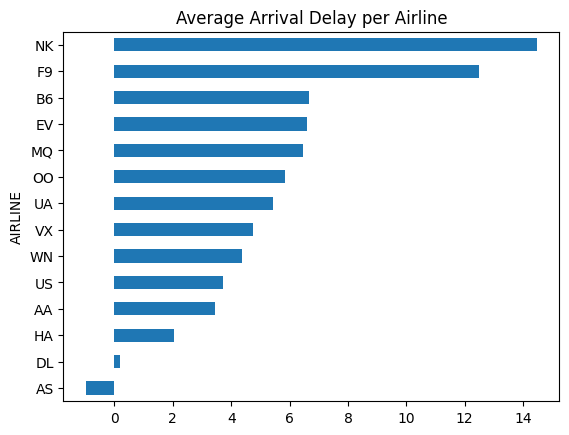

In [ ]:
avg_delay = flights_df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values()
avg_delay.plot(kind='barh', title='Average Arrival Delay per Airline')


<Axes: title={'center': 'Top 10 Busiest Origin Airports'}, xlabel='ORIGIN_AIRPORT'>

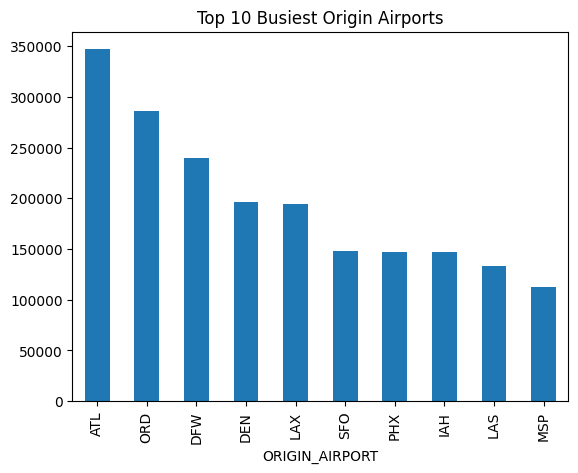

In [ ]:
flights_df['ORIGIN_AIRPORT'].value_counts().head(10).plot(kind='bar', title='Top 10 Busiest Origin Airports')


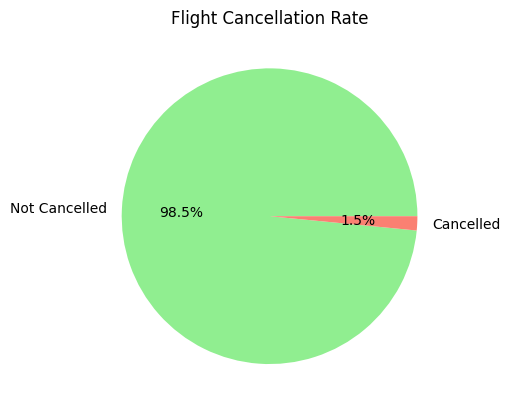

In [ ]:
flights_df['CANCELLED'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Not Cancelled', 'Cancelled'], colors=['lightgreen', 'salmon'])
plt.title('Flight Cancellation Rate')
plt.ylabel('')
plt.show()


Text(0, 0.5, 'Number of Flights')

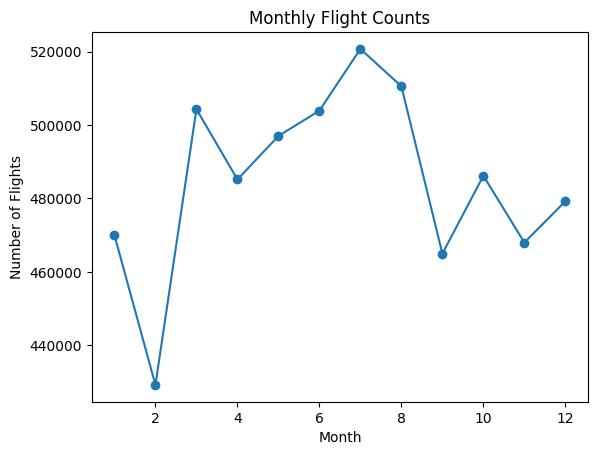

In [ ]:
monthly_flights = flights_df.groupby('MONTH').size()
monthly_flights.plot(kind='line', marker='o', title='Monthly Flight Counts')
plt.xlabel('Month')
plt.ylabel('Number of Flights')


Text(0.5, 1.0, 'Correlation Heatmap')

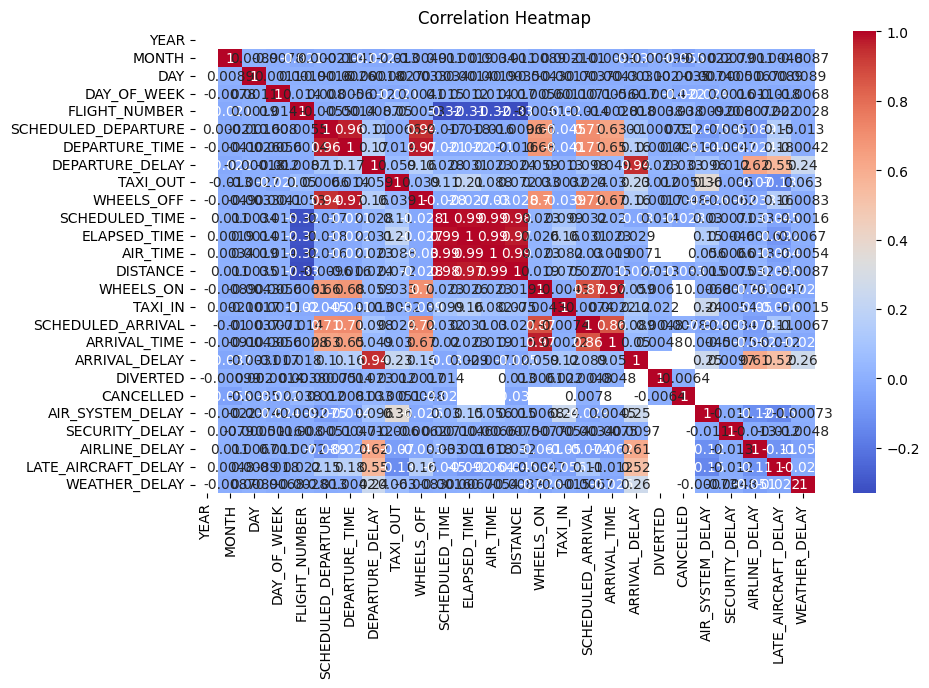

In [ ]:
numeric_cols = flights_df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


In [ ]:
flights_df[['AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY']].sort_values(by='ARRIVAL_DELAY', ascending=False).head(10)


,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY
337720,AA,1322,BHM,DFW,1971.0
3412085,AA,96,RIC,DFW,1898.0
4103531,AA,1063,SAN,DFW,1665.0
5279939,AA,2559,DTW,ORD,1638.0
5810811,AA,2214,ABQ,DFW,1636.0
3100911,AA,1319,IND,LAX,1636.0
886984,AA,1312,STL,MIA,1627.0
1278418,AA,1279,OMA,DFW,1598.0
264495,AA,224,LAS,LAX,1593.0
949876,AA,270,HNL,LAX,1576.0


In [ ]:
airline_flight_counts = flights_df['AIRLINE'].value_counts().reset_index()
airline_flight_counts.columns = ['AIRLINE_CODE', 'NUM_FLIGHTS']
airline_flight_counts = airline_flight_counts.merge(airlines_df, left_on='AIRLINE_CODE', right_on='IATA_CODE')
airline_flight_counts[['AIRLINE', 'NUM_FLIGHTS']]


,AIRLINE,NUM_FLIGHTS
0,Southwest Airlines Co.,1261855
1,Delta Air Lines Inc.,875881
2,American Airlines Inc.,725984
3,Skywest Airlines Inc.,588353
4,Atlantic Southeast Airlines,571977
5,United Air Lines Inc.,515723
6,American Eagle Airlines Inc.,294632
7,JetBlue Airways,267048
8,US Airways Inc.,198715
9,Alaska Airlines Inc.,172521


In [ ]:
origin_counts = flights_df['ORIGIN_AIRPORT'].value_counts().reset_index()
origin_counts.columns = ['IATA_CODE', 'NUM_DEPARTURES']
origin_counts = origin_counts.merge(airports_df, on='IATA_CODE')
origin_counts[['AIRPORT', 'CITY', 'STATE', 'NUM_DEPARTURES']].head(10)


,AIRPORT,CITY,STATE,NUM_DEPARTURES
0,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,346836
1,Chicago O'Hare International Airport,Chicago,IL,285884
2,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,239551
3,Denver International Airport,Denver,CO,196055
4,Los Angeles International Airport,Los Angeles,CA,194673
5,San Francisco International Airport,San Francisco,CA,148008
6,Phoenix Sky Harbor International Airport,Phoenix,AZ,146815
7,George Bush Intercontinental Airport,Houston,TX,146622
8,McCarran International Airport,Las Vegas,NV,133181
9,Minneapolis-Saint Paul International Airport,Minneapolis,MN,112117


In [ ]:
on_time_df = flights_df.copy()
on_time_df['ON_TIME'] = on_time_df['ARRIVAL_DELAY'] <= 0

on_time_performance = on_time_df.groupby('AIRLINE')['ON_TIME'].mean().reset_index()
on_time_performance.columns = ['AIRLINE_CODE', 'ON_TIME_PERCENT']
on_time_performance = on_time_performance.merge(airlines_df, left_on='AIRLINE_CODE', right_on='IATA_CODE')
on_time_performance[['AIRLINE', 'ON_TIME_PERCENT']].sort_values(by='ON_TIME_PERCENT', ascending=False)


,AIRLINE,ON_TIME_PERCENT
3,Delta Air Lines Inc.,0.707214
1,Alaska Airlines Inc.,0.663606
0,American Airlines Inc.,0.634648
10,United Air Lines Inc.,0.623465
13,Southwest Airlines Co.,0.611509
9,Skywest Airlines Inc.,0.602324
6,Hawaiian Airlines Inc.,0.601295
2,JetBlue Airways,0.599308
12,Virgin America,0.598808
4,Atlantic Southeast Airlines,0.597113


In [ ]:
on_time_df = flights_df.copy()
on_time_df['ON_TIME'] = on_time_df['ARRIVAL_DELAY'] <= 0

on_time_performance = on_time_df.groupby('AIRLINE')['ON_TIME'].mean().reset_index()
on_time_performance.columns = ['AIRLINE_CODE', 'ON_TIME_PERCENT']
on_time_performance = on_time_performance.merge(airlines_df, left_on='AIRLINE_CODE', right_on='IATA_CODE')
on_time_performance[['AIRLINE', 'ON_TIME_PERCENT']].sort_values(by='ON_TIME_PERCENT', ascending=False)


,AIRLINE,ON_TIME_PERCENT
3,Delta Air Lines Inc.,0.707214
1,Alaska Airlines Inc.,0.663606
0,American Airlines Inc.,0.634648
10,United Air Lines Inc.,0.623465
13,Southwest Airlines Co.,0.611509
9,Skywest Airlines Inc.,0.602324
6,Hawaiian Airlines Inc.,0.601295
2,JetBlue Airways,0.599308
12,Virgin America,0.598808
4,Atlantic Southeast Airlines,0.597113


In [ ]:
dep_delay_per_airport = flights_df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()
dep_delay_per_airport.columns = ['IATA_CODE', 'AVG_DEPARTURE_DELAY']
dep_delay_per_airport = dep_delay_per_airport.merge(airports_df, on='IATA_CODE')
dep_delay_per_airport[['AIRPORT', 'CITY', 'STATE', 'AVG_DEPARTURE_DELAY']].sort_values(by='AVG_DEPARTURE_DELAY', ascending=False).head(10)


,AIRPORT,CITY,STATE,AVG_DEPARTURE_DELAY
154,Wilmington Airport,Wilmington,DE,29.391753
219,Martha's Vineyard Airport,Marthas Vineyard,MA,25.907317
147,Barnstable Municipal Airport,Hyannis,MA,23.182927
293,St. Cloud Regional Airport,St Cloud,MN,18.692308
231,Southwest Oregon Regional Airport (North Bend ...,North Bend,OR,17.777358
19,Aspen-Pitkin County Airport,Aspen,CO,17.587538
57,Del Norte County Airport (Jack McNamara Field),Crescent City,CA,17.413793
133,Gustavus Airport,Gustavus,AK,17.171053
40,Jack Brooks Regional Airport (Southeast Texas ...,Beaumont/Port Arthur,TX,17.020856
137,Guam International Airport,Agana,GU,16.647590


In [ ]:
cancelled_flights = flights_df[flights_df['CANCELLED'] == 1]
cancelled_counts = cancelled_flights['AIRLINE'].value_counts().reset_index()
cancelled_counts.columns = ['AIRLINE_CODE', 'NUM_CANCELLED']
cancelled_counts = cancelled_counts.merge(airlines_df, left_on='AIRLINE_CODE', right_on='IATA_CODE')
cancelled_counts[['AIRLINE', 'NUM_CANCELLED']]


,AIRLINE,NUM_CANCELLED
0,Southwest Airlines Co.,16043
1,Atlantic Southeast Airlines,15231
2,American Eagle Airlines Inc.,15025
3,American Airlines Inc.,10919
4,Skywest Airlines Inc.,9960
5,United Air Lines Inc.,6573
6,JetBlue Airways,4276
7,US Airways Inc.,4067
8,Delta Air Lines Inc.,3824
9,Spirit Air Lines,2004


In [ ]:
route_counts = flights_df.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).size().reset_index(name='NUM_FLIGHTS')
route_counts.sort_values(by='NUM_FLIGHTS', ascending=False).head(10)


,ORIGIN_AIRPORT,DESTINATION_AIRPORT,NUM_FLIGHTS
11867,SFO,LAX,13744
10165,LAX,SFO,13457
9949,JFK,LAX,12016
10130,LAX,JFK,12015
10053,LAS,LAX,9715
10253,LGA,ORD,9639
10132,LAX,LAS,9594
11085,ORD,LGA,9575
11864,SFO,JFK,8440
9974,JFK,SFO,8437


In [ ]:
# If 'DAY_OF_WEEK' column is present
day_mapping = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
flights_df['DAY_NAME'] = flights_df['DAY_OF_WEEK'].map(day_mapping)

flights_df['DAY_NAME'].value_counts().reset_index().rename(columns={'index': 'Day', 'DAY_NAME': 'Flight_Count'})


,Flight_Count,count
0,Thu,872521
1,Mon,865543
2,Fri,862209
3,Wed,855897
4,Tue,844600
5,Sun,817764
6,Sat,700545


In [ ]:
# Assuming 'SCHEDULED_DEPARTURE' and 'SCHEDULED_ARRIVAL' are in HHMM format
# You may need to parse actual times to calculate duration
# If a 'SCHEDULED_TIME' column exists, use:
flights_df['SCHEDULED_TIME'].mean()


np.float64(141.6858915500802)

In [ ]:
combined_delay = flights_df.groupby('ORIGIN_AIRPORT')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean().reset_index()
combined_delay = combined_delay.merge(airports_df, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
combined_delay[['AIRPORT', 'CITY', 'STATE', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']].sort_values(by='ARRIVAL_DELAY', ascending=False).head(10)


,AIRPORT,CITY,STATE,DEPARTURE_DELAY,ARRIVAL_DELAY
154,Wilmington Airport,Wilmington,DE,29.391753,24.063158
133,Gustavus Airport,Gustavus,AK,17.171053,21.763158
246,Pago Pago International Airport (Tafuna Airport),Pago Pago,AS,15.102804,21.500000
293,St. Cloud Regional Airport,St Cloud,MN,18.692308,19.558442
40,Jack Brooks Regional Airport (Southeast Texas ...,Beaumont/Port Arthur,TX,17.020856,16.154696
19,Aspen-Pitkin County Airport,Aspen,CO,17.587538,15.492492
231,Southwest Oregon Regional Airport (North Bend ...,North Bend,OR,17.777358,14.333333
219,Martha's Vineyard Airport,Marthas Vineyard,MA,25.907317,12.980488
97,Eagle County Regional Airport,Eagle,CO,15.744398,12.401503
305,Trenton Mercer Airport,Trenton,NJ,14.440374,11.990256


In [ ]:
combined_delay = flights_df.groupby('ORIGIN_AIRPORT')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean().reset_index()
combined_delay = combined_delay.merge(airports_df, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
combined_delay[['AIRPORT', 'CITY', 'STATE', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']].sort_values(by='ARRIVAL_DELAY', ascending=False).head(10)


,AIRPORT,CITY,STATE,DEPARTURE_DELAY,ARRIVAL_DELAY
154,Wilmington Airport,Wilmington,DE,29.391753,24.063158
133,Gustavus Airport,Gustavus,AK,17.171053,21.763158
246,Pago Pago International Airport (Tafuna Airport),Pago Pago,AS,15.102804,21.500000
293,St. Cloud Regional Airport,St Cloud,MN,18.692308,19.558442
40,Jack Brooks Regional Airport (Southeast Texas ...,Beaumont/Port Arthur,TX,17.020856,16.154696
19,Aspen-Pitkin County Airport,Aspen,CO,17.587538,15.492492
231,Southwest Oregon Regional Airport (North Bend ...,North Bend,OR,17.777358,14.333333
219,Martha's Vineyard Airport,Marthas Vineyard,MA,25.907317,12.980488
97,Eagle County Regional Airport,Eagle,CO,15.744398,12.401503
305,Trenton Mercer Airport,Trenton,NJ,14.440374,11.990256
